In [ ]:
# Law of Large Numbers

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
import pandas as pd
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/local/bin/ffmpeg"
path_data = '../../../assets/data/'
df = pd.read_excel(path_data + 'event_count_bimodal_distribution.xlsx')
data = df['Event_Count'].to_numpy()

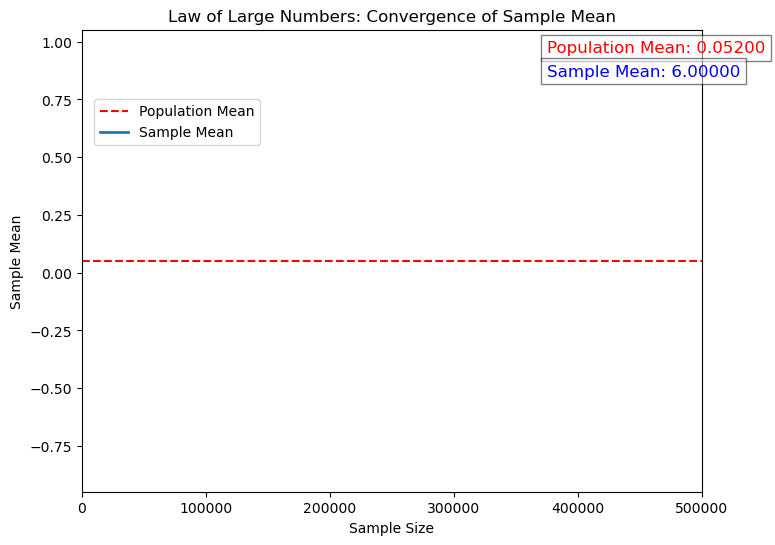

In [27]:
# Number of samples to take in each frame of the animation
sample_sizes = np.linspace(1, 500000, 200, dtype=int)  # Extended number of samples

# Calculate the population mean
population_mean = np.mean(data)

# Set up the figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, max(sample_sizes))
ax.set_ylim(np.mean(data) - 1, np.mean(data) + 1)
ax.set_title('Law of Large Numbers: Convergence of Sample Mean')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Sample Mean')

# Draw a horizontal line at the mean of the data
mean_line = ax.axhline(population_mean, color='red', linestyle='--', label='Population Mean')

# Initialize a line object for updating in the animation
line, = ax.plot([], [], lw=2, label='Sample Mean')

# Add text annotations for the mean values
pop_mean_text = ax.text(0.75, 0.95, '', transform=ax.transAxes, fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))
sample_mean_text = ax.text(0.75, 0.90, '', transform=ax.transAxes, fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.5))

ax.legend()

# Initialize the data for the line
xdata, ydata = [], []

# Function to animate each frame
def animate(frame):
    sample_size = sample_sizes[frame]
    sample = np.random.choice(data, sample_size, replace=True)
    sample_mean = np.mean(sample)

    pop_mean_text.set_text(f'Population Mean: {population_mean:.4f}')
    sample_mean_text.set_text(f'Sample Mean: {sample_mean:.4f}')

    # Update data for plotting
    xdata.append(sample_size)
    ydata.append(sample_mean)
    
    # Update the line data
    line.set_data(xdata, ydata)
    
    # Update the text annotations
    pop_mean_text.set_text(f'Population Mean: {population_mean:.5f}')
    sample_mean_text.set_text(f'Sample Mean: {sample_mean:.5f}')
    
    return line, pop_mean_text, sample_mean_text

ax.legend(loc=(0.02, 0.75)) 

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(sample_sizes), blit=True, repeat=False)


In [28]:
# Save the animation as a video file
video_path = "law_of_large_numbers.mp4"
ani.save(video_path, writer='ffmpeg', fps=10)  # Slowed down the video by reducing fps